In [1]:
from scipy.special import expit
from imldiff.plots import plot_shap_value_distribution, \
    plot_shap_partial_dependence, plot_shap_values_stacked, plot_shap_values_hierarchically_clustered, plot_functions
from imldiff.explainers import SHAPExplainer
from imldiff.util import printmd
import shap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
shap.initjs()

# Move Decision Boundary

## Create Models

In [2]:
f1 = lambda X: np.array([5 if x[0] > 0.0 else -5 for x in X])
f2 = lambda X: np.array([5 if x[0] + 0.3 > 0.0 else -5 for x in X])

c1 = lambda X: expit(f1(X))
c2 = lambda X: expit(f2(X))

In [3]:
x_from = -1
x_to = 1
feature_names = ['x1']
num_samples = 1000
x1 = np.linspace(x_from, x_to, num_samples)
X = np.reshape(x1, (num_samples, len(feature_names)))

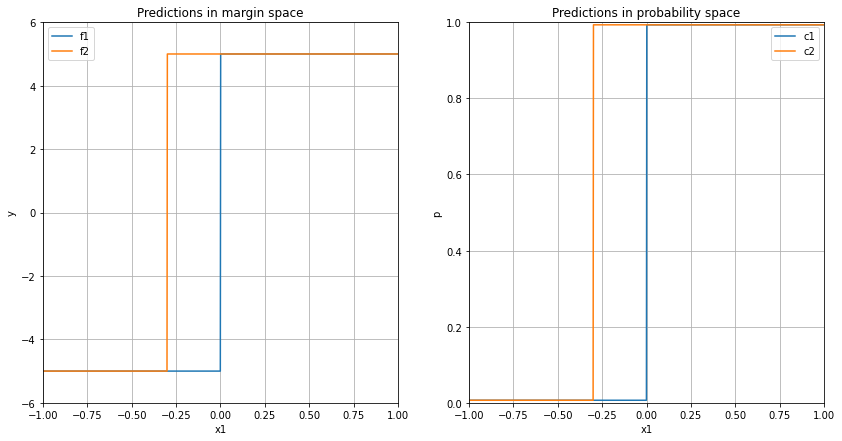

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
plot_functions(X, {'f1': f1, 'f2': f2}, 'Predictions in margin space', 'x1', 'y', (x_from, x_to), (-6, 6), axs[0])
plot_functions(X, {'c1': c1, 'c2': c2}, 'Predictions in probability space', 'x1', 'p', (x_from, x_to), (0, 1), axs[1])
plt.show()

In [5]:
complement = lambda p: 1 - p
c1_positive_and_c2_negative = lambda p1, p2: p1 * complement(p2)
c1_negative_and_c2_positive = lambda p1, p2: complement(p1) * p2
c1_and_c2_different = lambda p1, p2: c1_positive_and_c2_negative(p1, p2) + c1_negative_and_c2_positive(p1, p2)
odds = lambda p: p / complement(p)
log_odds_ratio_from_proba = lambda p1, p2: np.log(odds(p1) / odds(p2))

c_c1_positive_and_c2_negative = lambda X: c1_positive_and_c2_negative(c1(X), c2(X))
c_c1_negative_and_c2_positive = lambda X: c1_negative_and_c2_positive(c1(X), c2(X))
c_c1_and_c2_different = lambda X: c1_and_c2_different(c1(X), c2(X))
f_log_odds_ratio_from_proba = lambda X: log_odds_ratio_from_proba(c1(X), c2(X))

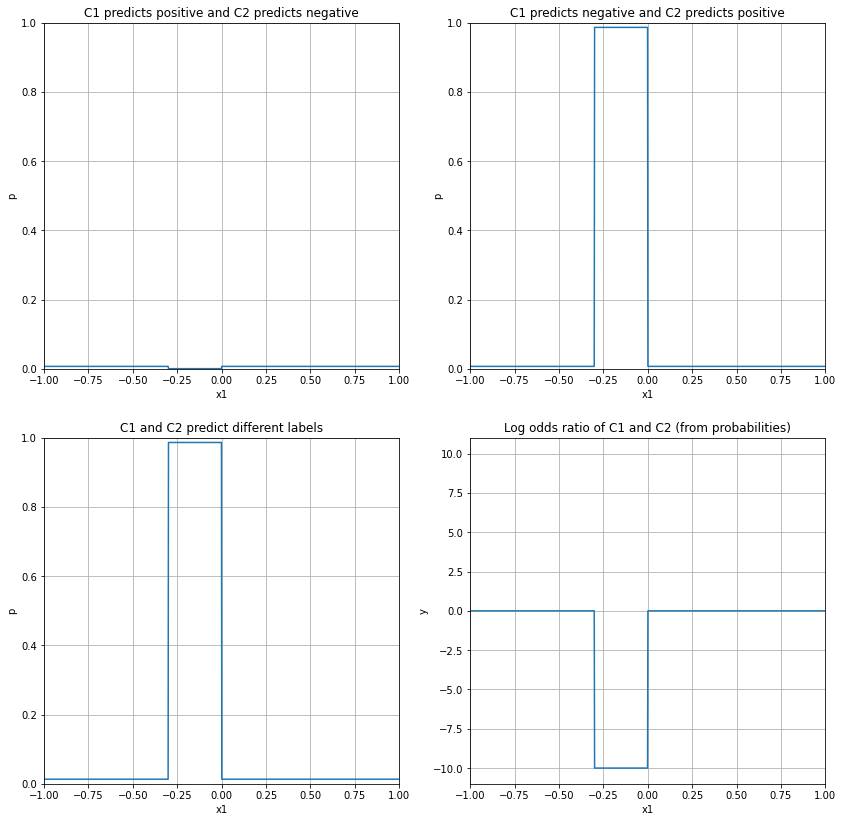

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
plot_functions(X, c_c1_positive_and_c2_negative, 'C1 predicts positive and C2 predicts negative', 'x1', 'p', (x_from, x_to), (0, 1), axs[0,0])
plot_functions(X, c_c1_negative_and_c2_positive, 'C1 predicts negative and C2 predicts positive', 'x1', 'p', (x_from, x_to), (0, 1), axs[0,1])
plot_functions(X, c_c1_and_c2_different, 'C1 and C2 predict different labels', 'x1', 'p', (x_from, x_to), (0, 1), axs[1,0])
plot_functions(X, f_log_odds_ratio_from_proba, 'Log odds ratio of C1 and C2 (from probabilities)', 'x1', 'y', (x_from, x_to), (-11, 11), axs[1,1])
plt.show()

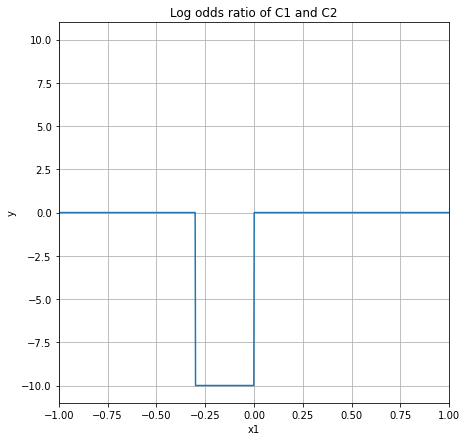

In [7]:
log_odds_ratio = lambda y1, y2: y1 - y2
f_log_odds_ratio = lambda X: log_odds_ratio(f1(X), f2(X))
plot_functions(X, f_log_odds_ratio, 'Log odds ratio of C1 and C2', 'x1', 'y', (x_from, x_to), (-11, 11))

## Generate Explanations

In [7]:
SHAPExplainer.group_name = notebook_name

probability_single_model_explainers = [
    make_shap_explainer(str(classifier), classifier.predict_proba, X, feature_names=feature_names)
    for classifier in classifiers]
log_odds_single_model_explainers = [
    make_shap_explainer(str(classifier) + ' Log Odds', classifier.predict_log_odds, X, feature_names=feature_names)
    for classifier in classifiers]
single_model_explainers = probability_single_model_explainers + log_odds_single_model_explainers

probability_comparison_explainers = [
    make_shap_explainer(str(comparer), comparer.predict_proba, X, feature_names=feature_names)
    for comparer in comparers]
log_odds_comparison_explainers = [
    make_shap_explainer(str(comparer) + ' Log Odds', comparer.predict_log_odds, X, feature_names=feature_names)
    for comparer in comparers]
comparison_explainers = probability_comparison_explainers + log_odds_comparison_explainers

explainers = single_model_explainers + comparison_explainers

Loaded explanation: explanations/Move Decision Boundary/Classifier.exp
Loaded explanation: explanations/Move Decision Boundary/ModifiedClassifier.exp
Loaded explanation: explanations/Move Decision Boundary/Classifier Log Odds.exp
Loaded explanation: explanations/Move Decision Boundary/ModifiedClassifier Log Odds.exp
Finished generating: explanations/Move Decision Boundary/Difference of Classifier and ModifiedClassifier.exp (0:00:57.869287)
Finished generating: explanations/Move Decision Boundary/Absolute Difference of Classifier and ModifiedClassifier.exp (0:00:32.798351)
Finished generating: explanations/Move Decision Boundary/Zero-Clipped Difference of Classifier and ModifiedClassifier.exp (0:00:30.238745)
Finished generating: explanations/Move Decision Boundary/Zero-Clipped Difference of ModifiedClassifier and Classifier.exp (0:00:30.265667)
Loaded explanation: explanations/Move Decision Boundary/Sum of Classifier and ModifiedClassifier.exp
Loaded explanation: explanations/Move Deci

Exact explainer: 1001it [00:57, 17.36it/s]                         
Exact explainer: 1001it [00:32, 19.89it/s]                         
Exact explainer: 1001it [00:30, 23.05it/s]                         
Exact explainer: 1001it [00:30, 21.13it/s]                          
Exact explainer: 1001it [00:40, 17.63it/s]                         
Exact explainer: 1001it [00:38, 19.86it/s]                         
Exact explainer: 1001it [00:23, 27.78it/s]                         
Exact explainer: 1001it [00:24, 21.70it/s]                         


## Analyze

### SHAP Value Distribution

#### Classifier

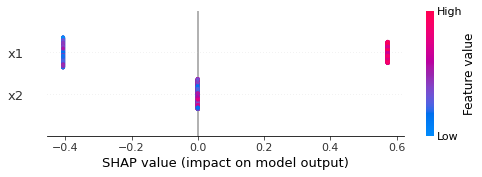

#### ModifiedClassifier

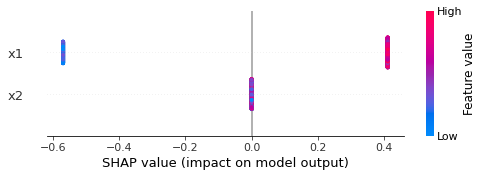

#### Classifier Log Odds

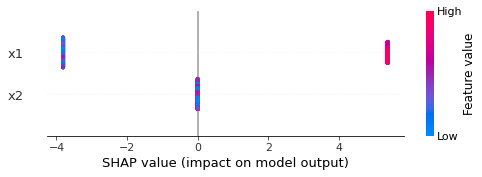

#### ModifiedClassifier Log Odds

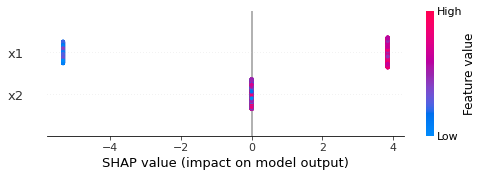

#### Difference of Classifier and ModifiedClassifier

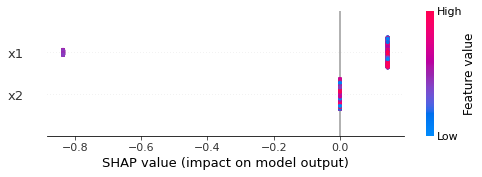

#### Absolute Difference of Classifier and ModifiedClassifier

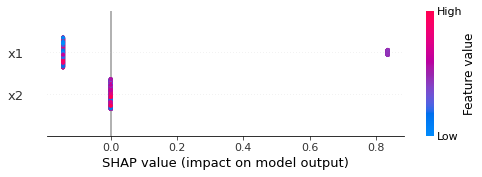

#### Zero-Clipped Difference of Classifier and ModifiedClassifier

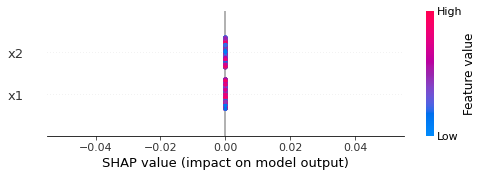

#### Zero-Clipped Difference of ModifiedClassifier and Classifier

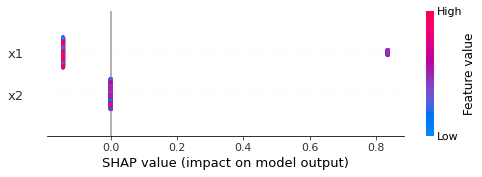

#### Sum of Classifier and ModifiedClassifier

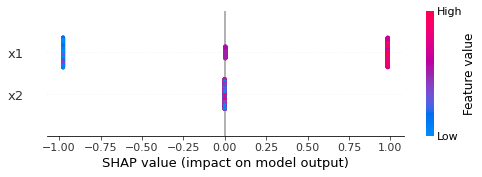

#### Similarity of Classifier and ModifiedClassifier

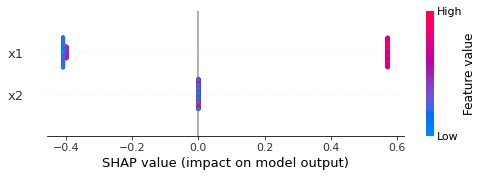

#### Dissimilarity of Classifier and ModifiedClassifier

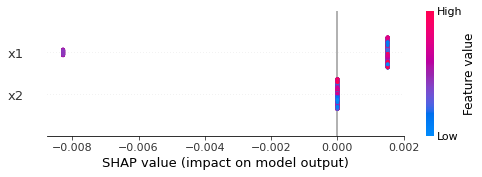

#### Dissimilarity of ModifiedClassifier and Classifier

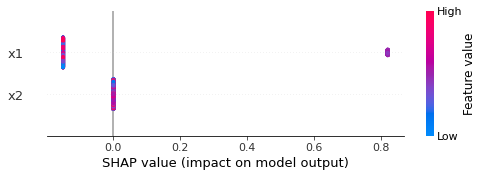

#### Difference of Classifier and ModifiedClassifier Log Odds

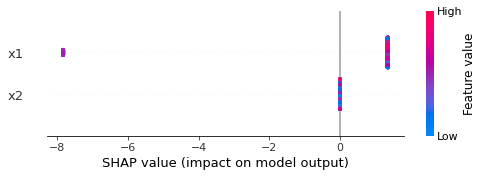

#### Absolute Difference of Classifier and ModifiedClassifier Log Odds

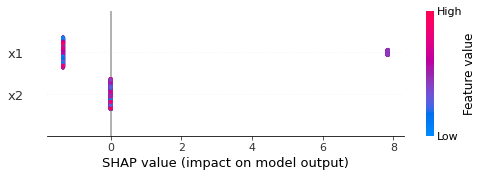

#### Zero-Clipped Difference of Classifier and ModifiedClassifier Log Odds

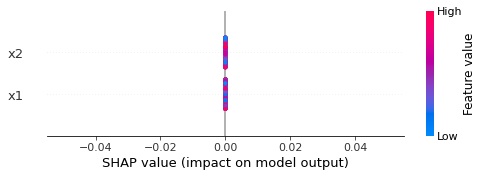

#### Zero-Clipped Difference of ModifiedClassifier and Classifier Log Odds

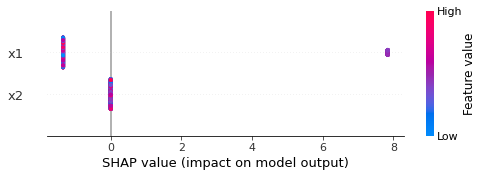

#### Sum of Classifier and ModifiedClassifier Log Odds

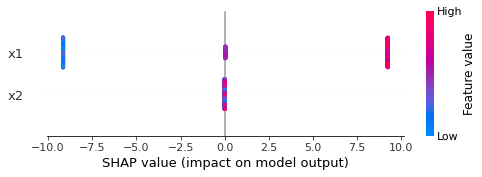

#### Similarity of Classifier and ModifiedClassifier Log Odds

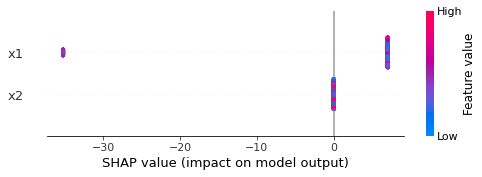

#### Dissimilarity of Classifier and ModifiedClassifier Log Odds

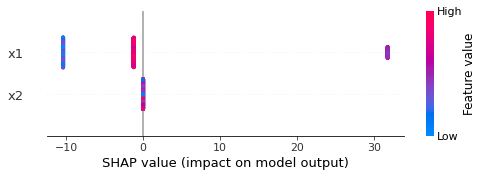

#### Dissimilarity of ModifiedClassifier and Classifier Log Odds

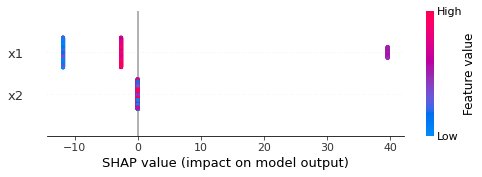

In [8]:
for explainer in explainers:
    plot_shap_value_distribution(explainer)

### Features' Partial Dependence Plots

#### Classifier

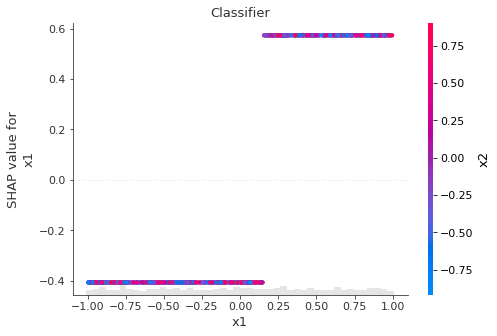

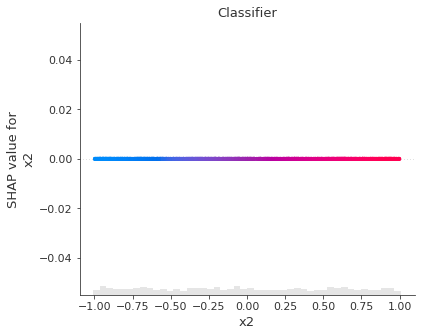

#### ModifiedClassifier

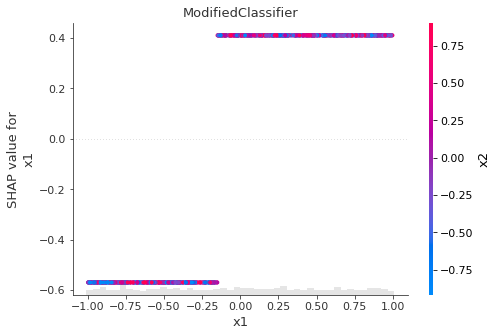

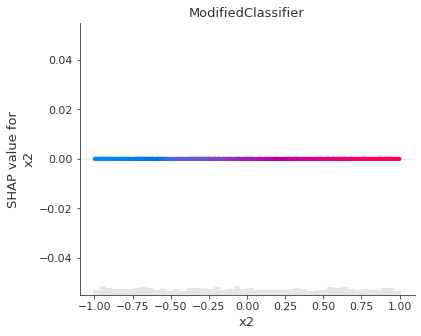

#### Classifier Log Odds

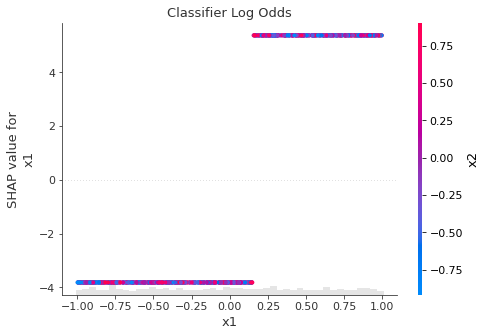

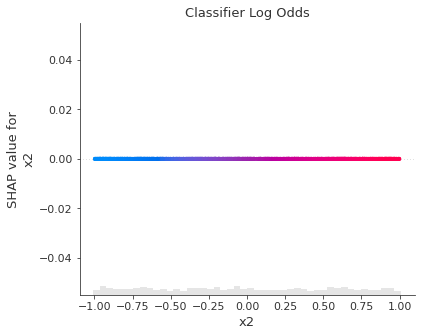

#### ModifiedClassifier Log Odds

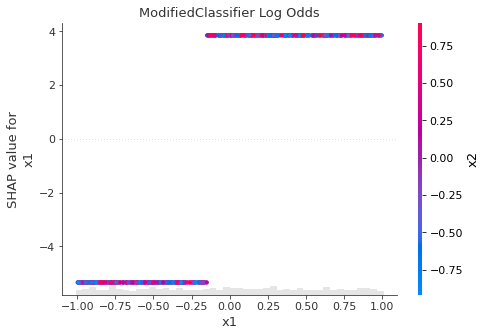

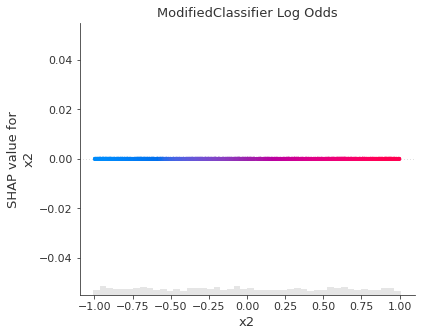

#### Difference of Classifier and ModifiedClassifier

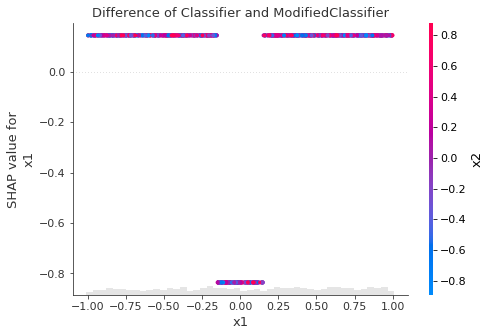

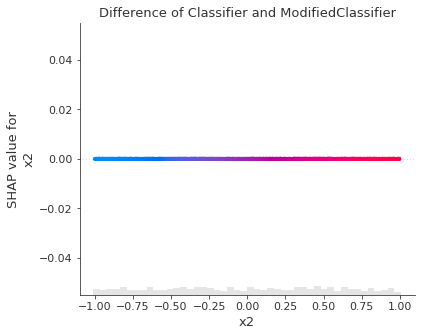

#### Absolute Difference of Classifier and ModifiedClassifier

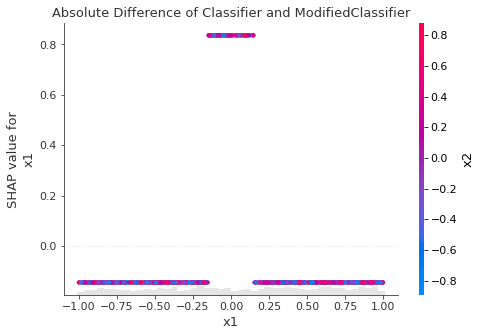

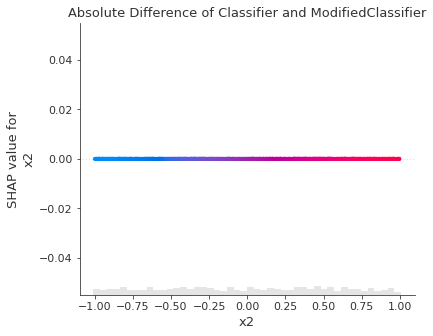

#### Zero-Clipped Difference of Classifier and ModifiedClassifier

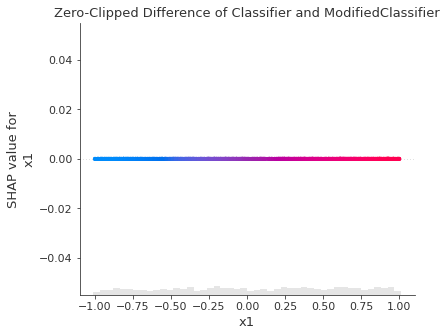

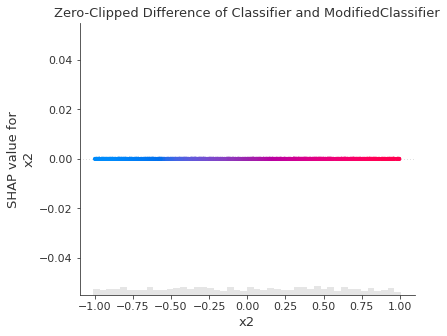

#### Zero-Clipped Difference of ModifiedClassifier and Classifier

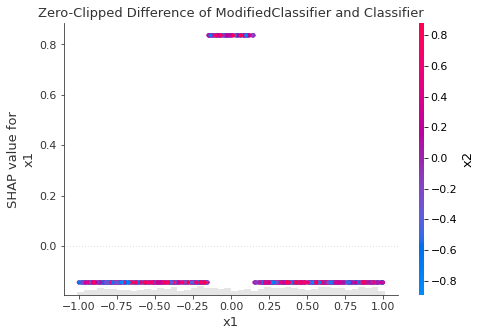

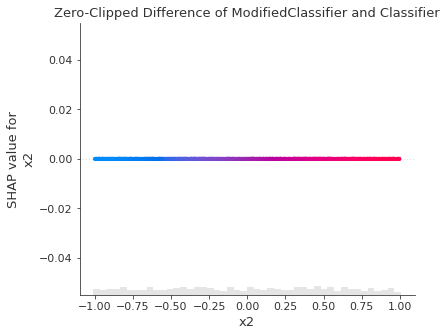

#### Sum of Classifier and ModifiedClassifier

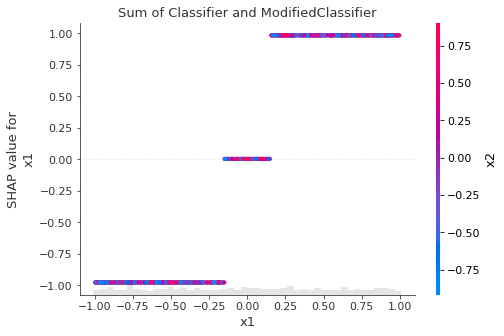

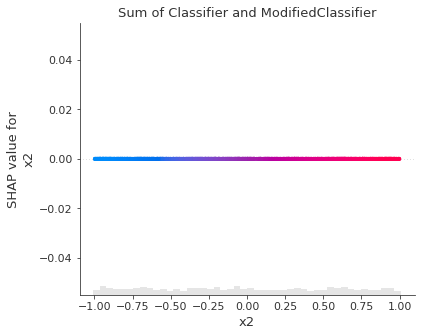

#### Similarity of Classifier and ModifiedClassifier

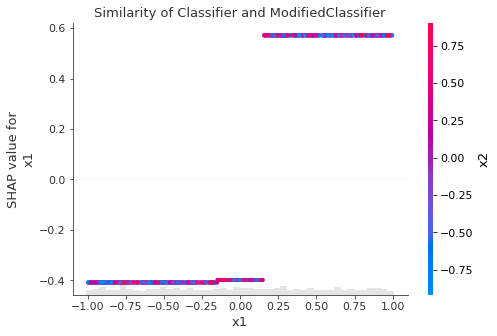

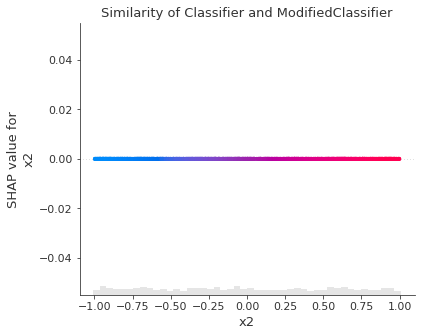

#### Dissimilarity of Classifier and ModifiedClassifier

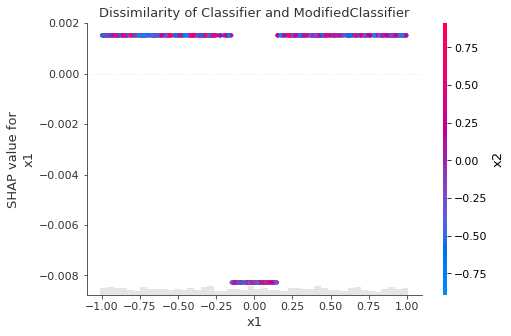

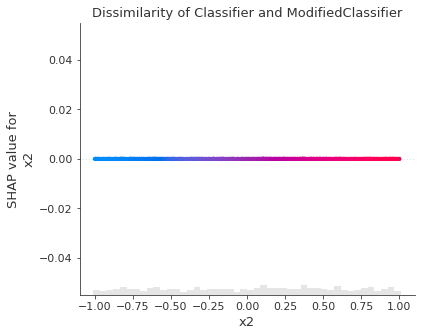

#### Dissimilarity of ModifiedClassifier and Classifier

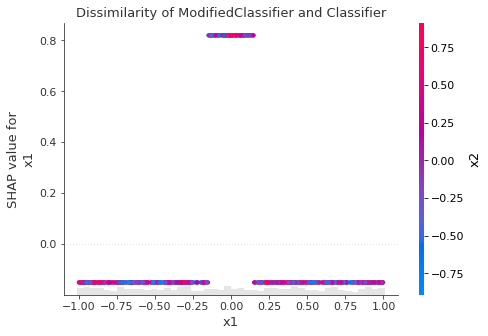

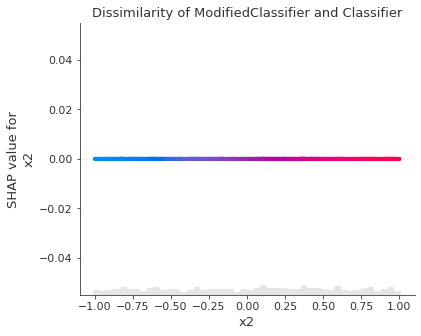

#### Difference of Classifier and ModifiedClassifier Log Odds

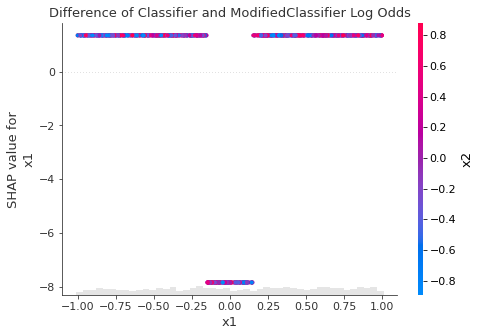

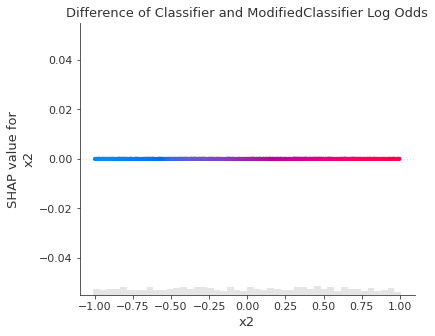

#### Absolute Difference of Classifier and ModifiedClassifier Log Odds

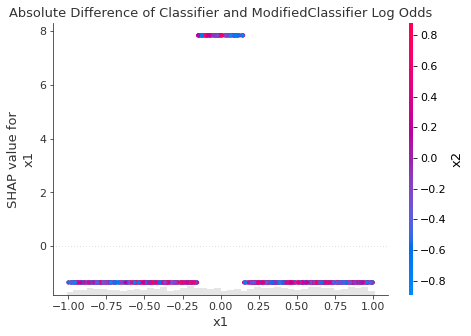

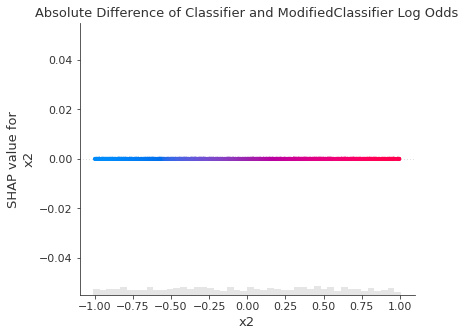

#### Zero-Clipped Difference of Classifier and ModifiedClassifier Log Odds

KeyboardInterrupt: 

<Figure size 432x360 with 0 Axes>

In [9]:
for explainer in explainers:
    plot_shap_partial_dependence(explainer)

### Stacked SHAP Explanations, Clustered by Similarity

In [ ]:
plot_shap_values_stacked(*probability_single_model_explainers)
plot_shap_values_stacked(*log_odds_single_model_explainers)

for explainer in comparison_explainers:
    plot_shap_values_stacked(explainer)

### Hierarchically Clustered SHAP Values

In [ ]:
for explainer in explainers:
    plot_shap_values_hierarchically_clustered(explainer)
